# 🔷 Modelo Entidade-Relacionamento (ER)

## ✨ Descrição do Domínio

Uma loja registra vendas realizadas por clientes, onde cada venda está associada a um produto e a um cliente. Queremos analisar os fatores que influenciam o **valor total da venda**.

---

## 🧱 Entidades e Atributos

### **Cliente**
- `id_cliente` (PK)
- `nome`
- `idade`
- `cidade`

### **Produto**
- `id_produto` (PK)
- `nome`
- `categoria`
- `preco`

### **Venda**
- `id_venda` (PK)
- `id_cliente` (FK → Cliente)
- `id_produto` (FK → Produto)
- `quantidade`
- `data`
- `total_venda` *(calculado)*

---

## 🔄 Relacionamentos

- **Cliente** realiza **Venda**
- **Produto** está presente em **Venda**

Cada venda está relacionada a **um único cliente** e **um único produto**, mas:

- Um cliente pode fazer **várias vendas**
- Um produto pode estar presente em **várias vendas**


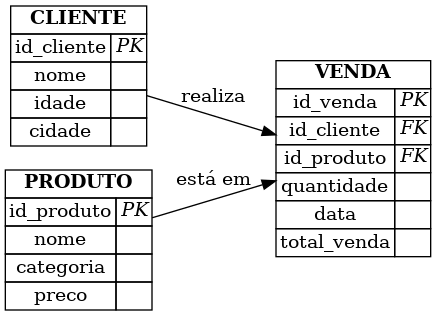

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Criando dados fictícios
np.random.seed(42)
n = 100

# Simula dados dos clientes
idade = np.random.randint(18, 60, size=n)

# Simula dados dos produtos
preco_produto = np.random.uniform(100, 3000, size=n)

# Quantidade vendida (influenciada por idade e preço)
quantidade = np.random.randint(1, 5, size=n)

# Valor total da venda
total_venda = preco_produto * quantidade + np.random.normal(0, 300, size=n)

# Criando DataFrame
df = pd.DataFrame({
    'idade_cliente': idade,
    'preco_produto': preco_produto,
    'quantidade': quantidade,
    'total_venda': total_venda
})

In [3]:
df

,idade_cliente,preco_produto,quantidade,total_venda
0,56,2565.111876,1,2955.215420
1,46,1403.406955,1,1000.349826
2,32,376.689338,2,1008.414850
3,25,1175.372931,3,3644.420780
4,38,2039.639633,3,6117.510100
...,...,...,...,...
95,59,2827.517467,2,5832.429769
96,56,1252.958861,4,4746.911847
97,58,1601.478917,3,4594.623335
98,45,2529.359307,3,7462.525257


from matplotlib import pyplot as plt
df['idade_cliente'].plot(kind='hist', bins=20, title='idade_cliente')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['preco_produto'].plot(kind='hist', bins=20, title='preco_produto')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['quantidade'].plot(kind='hist', bins=20, title='quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['total_venda'].plot(kind='hist', bins=20, title='total_venda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='idade_cliente', y='preco_produto', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='preco_produto', y='quantidade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='quantidade', y='total_venda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['idade_cliente'].plot(kind='line', figsize=(8, 4), title='idade_cliente')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['preco_produto'].plot(kind='line', figsize=(8, 4), title='preco_produto')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['quantidade'].plot(kind='line', figsize=(8, 4), title='quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['total_venda'].plot(kind='line', figsize=(8, 4), title='total_venda')
plt.gca().spines[['top', 'right']].set_visible(False)

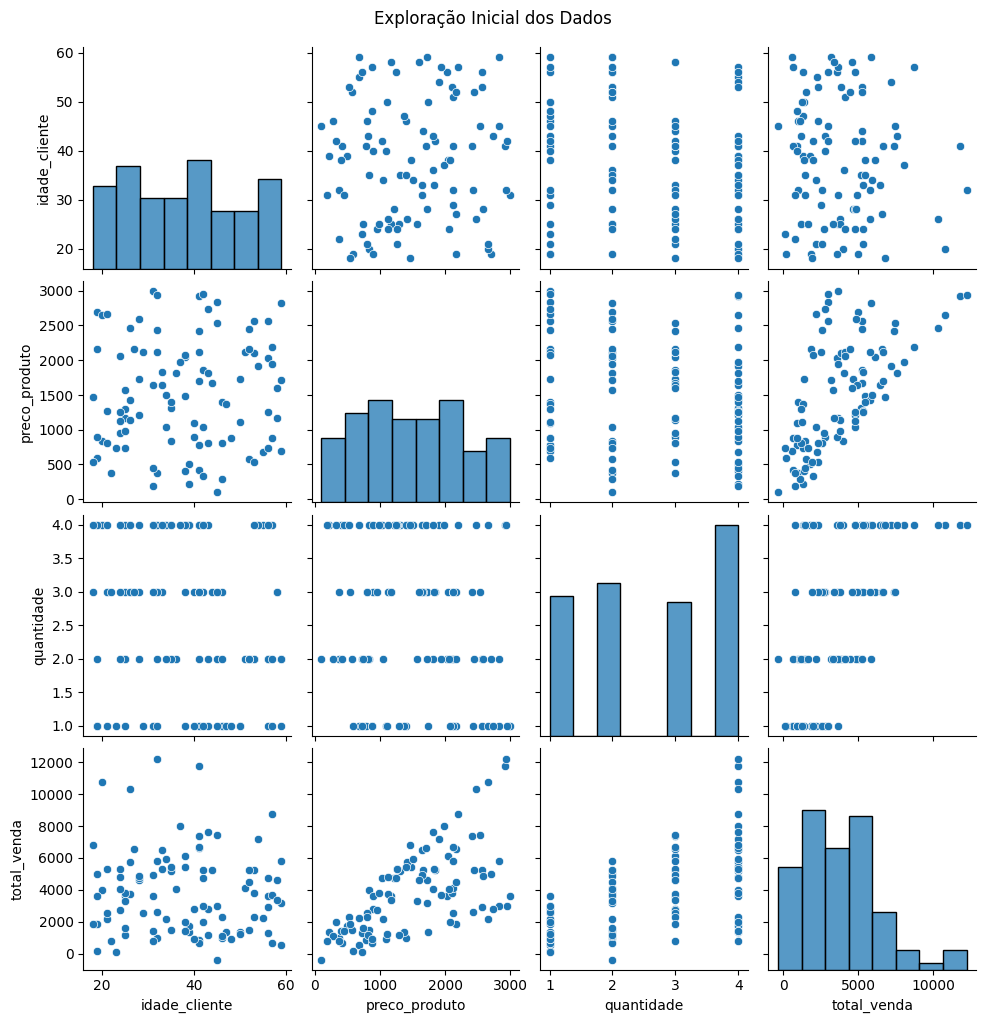

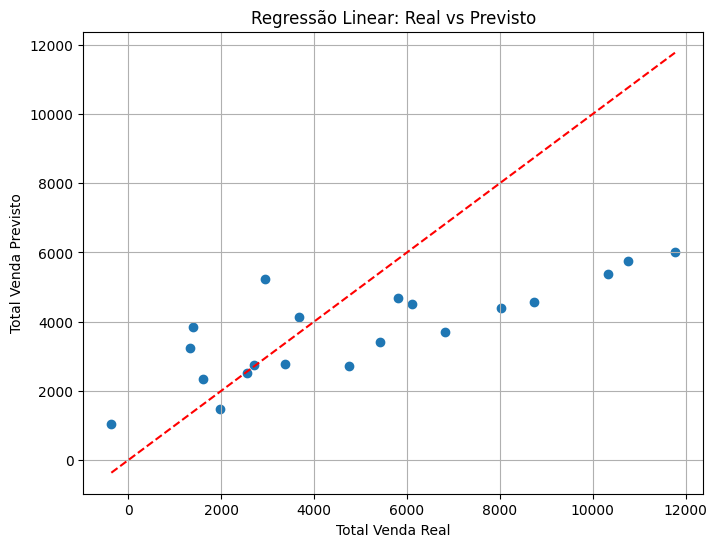

(array([-10.39245226,   1.75343504]),
 np.float64(1322.0048019448463),
 7639381.956620877,
 0.33975127268757566)

In [4]:
# Visualização
sns.pairplot(df)
plt.suptitle("Exploração Inicial dos Dados", y=1.02)
plt.show()

# Regressão Linear
X = df[['idade_cliente', 'preco_produto']]
y = df['total_venda']

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão
y_pred = model.predict(X_test)

# Avaliação
coeficientes = model.coef_
intercepto = model.intercept_
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizando os resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Total Venda Real")
plt.ylabel("Total Venda Previsto")
plt.title("Regressão Linear: Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

coeficientes, intercepto, mse, r2
